<p>
<img src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" align="left" width="200">
</p>
<p>
<h1><b><center>Mecánica de Medios Continuos</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>

<h3><b><center>Modelando el interior solar</center></b><h3>

</p>

<hr/>
<b>Nombre</b>: Brayan Alejandro Murillo González
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea estudiar el interior de estrellas reales usando para ello modelos politrópicos de cuerpos autogravitantes.

Para ello nos apoyaremos, como fuente de información y para validar nuestros modelos, de los resultados de simulaciones realistas del interior estelar disponibles en el sitio web http://user.astro.wisc.edu/~townsend/static.php?ref=ez-web.

**Procedimiento**:

Para conseguir el objetivo:

1. Descargar los datos de evolución y estructura interior de una estrella con la masa, metalicidad (Z=0.02) del Sol usando el formulario http://user.astro.wisc.edu/~townsend/static.php?ref=ez-web#Submit_a_Calculation.


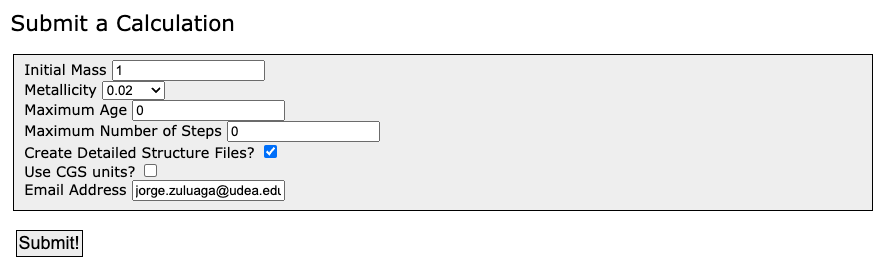

# Interior del Sol
2. Los datos provistos en un archivo comprimido son:

   - *summary.txt*: contienen datos sobre la evolución de la estrella. Las columnas del archivos se describen en http://user.astro.wisc.edu/~townsend/static.php?ref=ez-web. En particular nos interesa la primera columna *i* que indica el archivo con la estructura detallada en cada tiempo de simulación. En la segunda columna *t* esta la edad de la estrella. Para cada edad nos dan las propiedades de la estrella, masa, luminosidad, radio, densidad central, presión central, etc.

   - *structure_NNNNN.txt*: archivos con datos de las propiedades interiores de la estrella. Las columnas del archivo se describen en http://user.astro.wisc.edu/~townsend/static.php?ref=ez-web. En particular nos interesan las columnas de radio (columna 2), temperatura (columna 6), densidad (columna 5), presión (columna 4), índice adiabático (columna 10).

   Hacer gráficos de las siguientes propiedades de la estrella como función del tiempo:

   - Temperatura central.
   - Fracción de Helio en el centro.
   - Radio de la estrella.

   Estos gráficos nos dan una idea de las distintas etapas por las que pasa la estrella.

3. Vamos a estudiar la estructura del Sol en 4 momentos de su vida. Para cada uno de estos momentos recuperar los datos de la estructura provistos por el modelo.

   - **Inicio**. En la fase de secuencia principal de edad 0. Este es el primer momento de la estrella.
   - **Tiempo presente**. En la fase actual, correspondiente a 4560 millones de años.
   - **Fin de la secuencia principal**. En la fase de final de la fusión del Hidrógeno en el centro, que corresponde a un tiempo cuando la fracción de Helio en el centro alcanza un valor $Y_c \approx 1$.
   - **Fusión del Helio (gigante roja)**. En la fase de fusión del Helio, cuando la temperatura del centro es 75 millones de grados.

4. Para cada etapa vamos a usar la solución a la ecuación de Lane-Emden para encontrar la temperatura, densidad y presión interior de la estrella y vamos a comparar la calidad de nuestro modelo con el modelo exacto.

   - Recuperar el valor del índice adiabático $\gamma$ y el calor específico $C_P$ del modelo realista para la estrella.

   - Usando las propiedades superficiales (masa, radio) calcular la temperatura y densidad central predicha por la ecuación de Lane-Emden (como lo hicimos en el ejemplo de clase).

   - Calcular la temperatura densidad y presión del interior de la estrella usando la solución de la ecuación de Lane-Emden en cada fase y comparar con el modelo realista de la estrella.

5. ¿Cómo podría mejorarse el ajuste entre las propiedades calculadas con el modelo politrópico y el model realista? Intentelo al menos con el interior del Sol en una de las etapas estudiadas.


# **Solución**

# Carga de Summary


In [ ]:
# Se descarga el summary de los datos alojados en carpeta local de drive
import pandas as pd
!gdown "1tkR1ZLfCUQ3_Jhyj02_P6N4ihkGbusTN" -q

# Se almacena sumary en un dataframe
sumary = pd.read_csv("summary.txt",delimiter="\s+", header=None)

# Descripción de Summary

| Column Number | Datum                  | Description                                   |
|---------------|------------------------|-----------------------------------------------|
| 1             | *i*                    | Step number                                   |
| 2             | *t*                    | Age (years)                                  |
| 3             | *M*                    | Mass (M<sub>☉</sub>)                        |
| 4             | Log<sub>10</sub> *L*   | Luminosity (L<sub>☉</sub>)                  |
| 5             | Log<sub>10</sub> *R*   | Radius (R<sub>☉</sub>)                      |
| 6             | Log<sub>10</sub> *T*<sub>s</sub>  | Surface temperature (K)         |
| 7             | Log<sub>10</sub> *T*<sub>c</sub>  | Central temperature (K)         |
| 8             | Log<sub>10</sub> *ρ*<sub>c</sub>  | Central density (kg m<sup>-3</sup>)  |
| 9             | Log<sub>10</sub> *P*<sub>c</sub>  | Central pressure (N m<sup>-2</sup>)  |
| 10            | *ψ*<sub>c</sub>        | Central electron degeneracy parameter       |
| 11            | *X*<sub>c</sub>        | Central hydrogen mass fraction               |
| 12            | *Y*<sub>c</sub>        | Central helium mass fraction                 |
| 13            | *X*<sub>C,c</sub>      | Central carbon mass fraction                 |
| 14            | *X*<sub>N,c</sub>      | Central nitrogen mass fraction               |
| 15            | *X*<sub>O,c</sub>      | Central oxygen mass fraction                 |
| 16            | *τ*<sub>dyn</sub>      | Dynamical timescale (seconds)               |
| 17            | *τ*<sub>KH</sub>       | Kelvin-Helmholtz timescale (years)           |
| 18            | *τ*<sub>nuc</sub>      | Nuclear timescale (years)                   |
| 19            | *L*<sub>PP</sub>       | Luminosity from PP chain (L<sub>☉</sub>)    |
| 20            | *L*<sub>CNO</sub>      | Luminosity from CNO cycle (L<sub>☉</sub>)   |
| 21            | *L*<sub>3α</sub>       | Luminosity from triple-alpha reactions (L<sub>☉</sub>) |
| 22            | *L*<sub>Z</sub>        | Luminosity from metal burning (L<sub>☉</sub>) |
| 23            | *L*<sub>ν</sub>        | Luminosity of neutrino losses (L<sub>☉</sub>) |
| 24            | *M*<sub>He</sub>       | Mass of helium core (M<sub>☉</sub>)         |
| 25            | *M*<sub>C</sub>        | Mass of carbon core (M<sub>☉</sub>)         |
| 26            | *M*<sub>O</sub>        | Mass of oxygen core (M<sub>☉</sub>)         |
| 27            | *R*<sub>He</sub>       | Radius of helium core (R<sub>☉</sub>)       |
| 28            | *R*<sub>C</sub>        | Radius of carbon core (R<sub>☉</sub>)       |
| 29            | *R*<sub>O</sub>        | Radius of oxygen core (R<sub>☉</sub>)       |


# Descripción de Structure

| Column Number | Datum                  | Description                                           |
|---------------|------------------------|-------------------------------------------------------|
| 1             | *M<sub>r</sub>*        | Lagrangian mass coordinate (M<sub>☉</sub>)            |
| 2             | *r*                    | Radius coordinate (R<sub>☉</sub>)                    |
| 3             | *L<sub>r</sub>*        | Luminosity (L<sub>☉</sub>)                           |
| 4             | *P*                    | Total pressure (N m<sup>-2</sup>)                    |
| 5             | *ρ*                    | Density (kg m<sup>-3</sup>)                           |
| 6             | *T*                    | Temperature (K)                                       |
| 7             | *U*                    | Specific internal energy (J kg<sup>-1</sup>)          |
| 8             | *S*                    | Specific entropy (J K<sup>-1</sup> kg<sup>-1</sup>)   |
| 9             | *C<sub>P</sub>*        | Specific heat at constant pressure (J K<sup>-1</sup> kg<sup>-1</sup>) |
| 10            | *Γ<sub>1</sub>*        | First adiabatic exponent                              |
| 11            | ∇<sub>ad</sub>          | Adiabatic temperature gradient                        |
| 12            | *μ*                    | Mean molecular weight (see note below)               |
| 13            | *n<sub>e</sub>*        | Electron number density (m<sup>-3</sup>)              |
| 14            | *P<sub>e</sub>*        | Electron pressure (N m<sup>-2</sup>)                 |
| 15            | *P<sub>r</sub>*        | Radiation pressure (N m<sup>-2</sup>)                |
| 16            | ∇<sub>rad</sub>        | Radiative temperature gradient                        |
| 17            | ∇                      | Material temperature gradient                        |
| 18            | *v<sub>c</sub>*        | Convective velocity (m s<sup>-1</sup>)               |
| 19            | *κ*                    | Rosseland mean opacity (m<sup>2</sup> kg<sup>-1</sup>) |
| 20            | *ε<sub>nuc</sub>*      | Power per unit mass from all nuclear reactions, excluding neutrino losses (W kg<sup>-1</sup>) |
| 21            | *ε<sub>PP</sub>*       | Power per unit mass from PP chain (W kg<sup>-1</sup>) |
| 22            | *ε<sub>CNO</sub>*      | Power per unit mass from CNO cycle (W kg<sup>-1</sup>) |
| 23            | *ε<sub>3α</sub>*       | Power per unit mass from triple-alpha reaction (W kg<sup>-1</sup>) |
| 24            | *ε<sub>ν,nuc</sub>*    | Power loss per unit mass in nuclear neutrinos (W kg<sup>-1</sup>) |
| 25            | *ε<sub>ν</sub>*        | Power loss per unit mass in non-nuclear neutrinos (W kg<sup>-1</sup>) |
| 26            | *ε<sub>grav</sub>*     | Power per unit mass from gravitational contraction (W kg<sup>-1</sup>) |
| 27            | *X*                    | Hydrogen mass fraction (all ionization stages)        |
| 28            | —                      | Molecular hydrogen mass fraction                     |
| 29            | *X<sup>+</sup>*        | Singly-ionized hydrogen mass fraction                |
| 30            | *Y*                    | Helium mass fraction (all ionization stages)          |
| 31            | *Y<sup>+</sup>*        | Singly-ionized helium mass fraction                   |
| 32            | *Y<sup>++</sup>*       | Doubly-ionized helium mass fraction                   |
| 33            | *X<sub>C</sub>*        | Carbon mass fraction                                   |
| 34            | *X<sub>N</sub>*        | Nitrogren mass fraction                                |
| 35            | *X<sub>O</sub>*        | Oxygen mass fraction                                   |
| 36            | *ψ*                    | Electron degeneracy parameter                         |


# 1. Gráficas

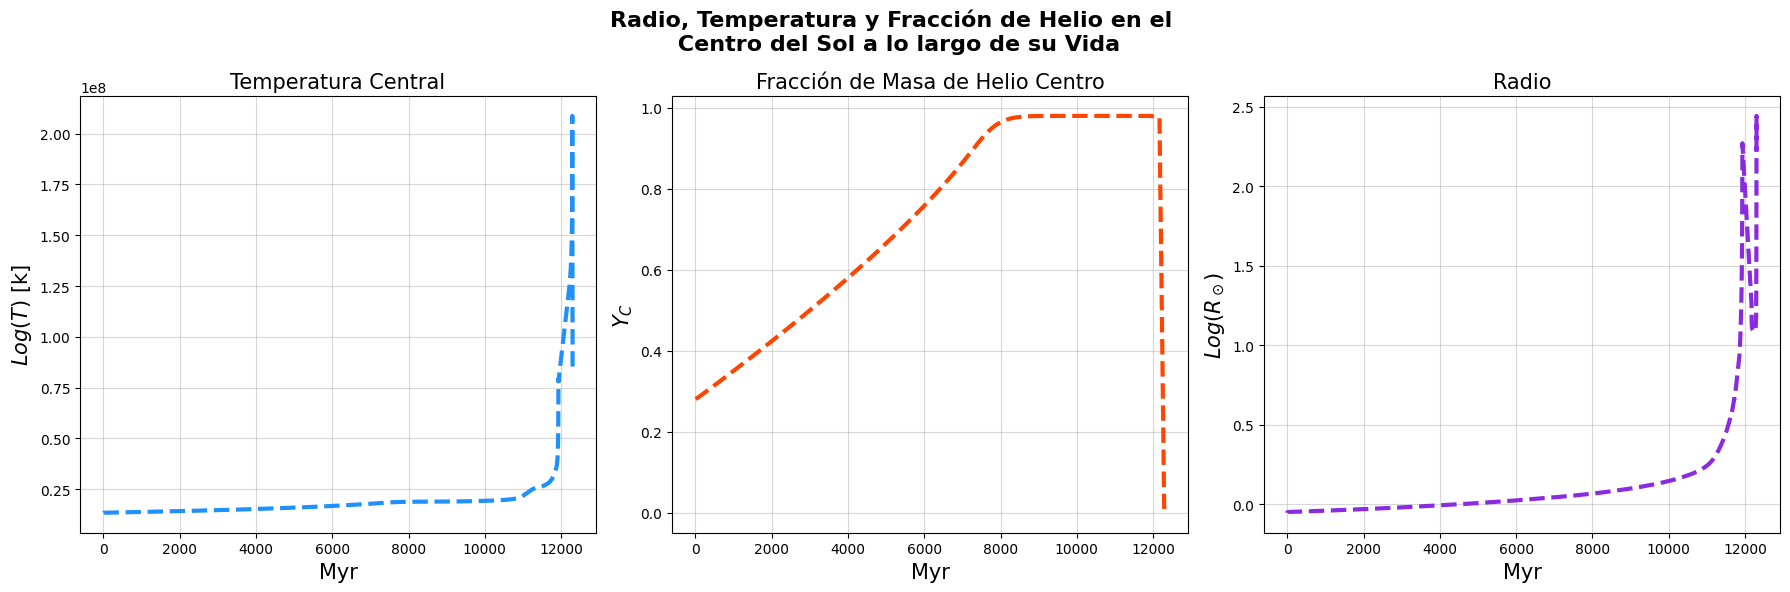

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Edades del Sol
t = sumary.iloc[:,1]


# Se crea la figura
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Radio, Temperatura y Fracción de Helio en el \n Centro del Sol a lo largo de su Vida", fontsize=16, fontweight='bold')  # Ajusta el tamaño y el peso de la fuente del título

axes[0].plot(t/1e6, 10**sumary.iloc[:,6],linestyle="--",linewidth=3, color= "dodgerblue")
axes[0].set_title('Temperatura Central',size=15)
axes[0].set_ylabel("$Log(T)$ [k]",size=15)


axes[1].plot(t/1e6, sumary.iloc[:,11],linestyle="--",linewidth=3, color="orangered")

axes[1].set_title('Fracción de Masa de Helio Centro',size=15)
axes[1].set_ylabel("$Y_C$",size=15)

axes[2].plot(t/1e6,  sumary.iloc[:,4],linestyle="--",linewidth=3,color="blueviolet")
axes[2].set_title('Radio',size=15)
axes[2].set_ylabel("$Log(R_\odot)$",size=15)

for i in range(3):
  axes[i].grid(alpha=0.5)
  axes[i].set_xlabel("Myr",size=15)
# Ajustar automáticamente los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()




# 3. Edades

Se procede a diferenciar las distintas etapas del sol a lo largo de su evolución, para ello se define la siguiente función:

In [ ]:


def etapas(df1,col,valor,log=False):
  """Calcula el indice del archivo structure correspondiente a la
      etapa de la estrella segun el parámetro específico (edad,fracción de helio,temperatura del centro..)"""

  if log:
    dif = np.abs(10**df1.iloc[:,col] - valor)
    ind = dif.idxmin()
  # Calcula la diferencia absoluta entre cada valor y 1
  else:
    dif = np.abs(df1.iloc[:,col] - valor)
  # Encuentra el índice con la menor diferencia
    ind = dif.idxmin()

  # Devuelve el indice de la etapa y el resumen
  sumary_=  df1.iloc[ind,:]
  return(ind,sumary_)

## Inicio secuencia principal

En esta etapa la edad de la estrella es 0 años.

In [ ]:
ind, sumary_sp = etapas(sumary,0,0)


print(f"Edad: {sumary_sp[1]:.2e} [yr]")
print(f"Masa: {sumary_sp[2]} [M☉]")
print(f"Radio: {10**sumary_sp[4]:.2f} [R☉]")
print(f"Temperatura Central: {10**sumary_sp[6]:.2f} [k]")
print(f"Densidad Central: {10**sumary_sp[7]:.2f} [Kg/m³]")
print(f"Presión Central: {10**sumary_sp[8]:.2e} [Pa]")
print(f"structure_{ind:05d}.txt")

Edad: 0.00e+00 [yr]
Masa: 1.0 [M☉]
Radio: 0.89 [R☉]
Temperatura Central: 13374599.62 [k]
Densidad Central: 78300.10 [Kg/m³]
Presión Central: 1.41e+16 [Pa]
structure_00000.txt


In [ ]:
!gdown "1Mj5YIOIQZGkz7dAIStQwnU_YaWTEkhaT" -q
structure_sp=pd.read_csv(f"structure_{ind:05d}.txt",delimiter="\s+",header=None)
structure_sp = structure_sp.iloc[:,[1,3,4,5,8,9,26,29]]

## Tiempo presente

La edad de la estrella está en la columna 1, buscamos el momento en que la estrella tiene 4500 millones de años

In [ ]:
ind, sumary_tp = etapas(sumary,1,4.5e9)

print(f"Edad: {sumary_tp[1]:.3e} [yr]")
print(f"Masa: {sumary_tp[2]:.3f} [M☉]")
print(f"Radio: {10**sumary_tp[4]:.3f} [R☉]")
print(f"Temperatura Central: {10**sumary_tp[6]:.3e} [k]")
print(f"Densidad Central: {10**sumary_tp[7]:.3e} [Kg/m³]")
print(f"Presión Central: {10**sumary_tp[8]:.3e} [Pa]")
print(f"structure_{ind:05d}.txt")

Edad: 4.560e+09 [yr]
Masa: 1.000 [M☉]
Radio: 1.006 [R☉]
Temperatura Central: 1.564e+07 [k]
Densidad Central: 1.516e+05 [Kg/m³]
Presión Central: 2.358e+16 [Pa]
structure_00065.txt


In [ ]:
!gdown "1TIOElKI95TtTWyR-I2yR3W992c-X-r2E" -q
structure_tp = pd.read_csv(f"structure_{ind:05d}.txt",delimiter="\s+",header=None)
structure_tp = structure_tp.iloc[:,[1,3,4,5,8,9,26,29]]

## Fin de la secuencia principal

 En la fase de final de la fusión del Hidrógeno en el centro, que corresponde a un tiempo cuando la fracción de Helio en el centro alcanza un valor $Y_c \approx 1$, este valor se encuentra en la columna 11.

In [ ]:

ind,sumary_fsp= etapas(sumary,11,1)

print(f"Edad: {sumary_fsp[1]:.3e} [yr]")
print(f"Masa: {sumary_fsp[2]:.3f} [M☉]")
print(f"Radio: {10**sumary_fsp[4]:.3f} [R☉]")
print(f"Temperatura Central: {10**sumary_fsp[6]:.3e} [k]")
print(f"Densidad Central: {10**sumary_fsp[7]:.3e} [Kg/m³]")
print(f"Presión Central: {10**sumary_fsp[8]:.3e} [Pa]")
print(f"Fracción de Masa de Helio en el centro: {sumary_fsp[11]} ")
print(f"structure_{ind:05d}.txt")

Edad: 1.027e+10 [yr]
Masa: 0.999 [M☉]
Radio: 1.463 [R☉]
Temperatura Central: 1.949e+07 [k]
Densidad Central: 1.376e+06 [Kg/m³]
Presión Central: 1.821e+17 [Pa]
Fracción de Masa de Helio en el centro: 0.979999296 
structure_00135.txt


In [ ]:
!gdown "1zdc8fwmUtBnkyEUxwnmnT5AcgXq6L4tF" -q
structure_fsp = pd.read_csv(f"structure_{ind:05d}.txt",delimiter="\s+",header=None)
structure_fsp = structure_fsp.iloc[:,[1,3,4,5,8,9,26,29]]

## Gigante Roja
Esta fase se alcanza cuando la temperatura del centro es de 75 millones de grados.

In [ ]:

ind, sumary_Gr = etapas(sumary,6,7.5e7,log=True)


print(f"Edad: {sumary_Gr[1]:.3e} [yr]")
print(f"Masa: {sumary_Gr[2]:.3f} [M☉]")
print(f"Radio: {10**sumary_Gr[4]:.3f} [R☉]")
print(f"Temperatura Central: {10**sumary_Gr[6]:.3e} [k]")
print(f"Densidad Central: {10**sumary_Gr[7]:.3e} [Kg/m³]")
print(f"Presión Central: {10**sumary_Gr[8]:.3e} [Pa]")
print(f"structure_{ind:05d}.txt")

Edad: 1.193e+10 [yr]
Masa: 0.901 [M☉]
Radio: 157.377 [R☉]
Temperatura Central: 7.516e+07 [k]
Densidad Central: 7.656e+08 [Kg/m³]
Presión Central: 1.847e+21 [Pa]
structure_00454.txt


In [ ]:
!gdown "1rOh_WQOtMw7RCU5A_bUiqs3ZXfy1Kdv7" -q

structure_Gr= pd.read_csv(f"structure_{ind:05d}.txt",delimiter="\s+",header=None)
structure_Gr = structure_Gr.iloc[:,[1,3,4,5,8,9,26,29]]

## Gráfica identificando las etapas de la evolución del Sol


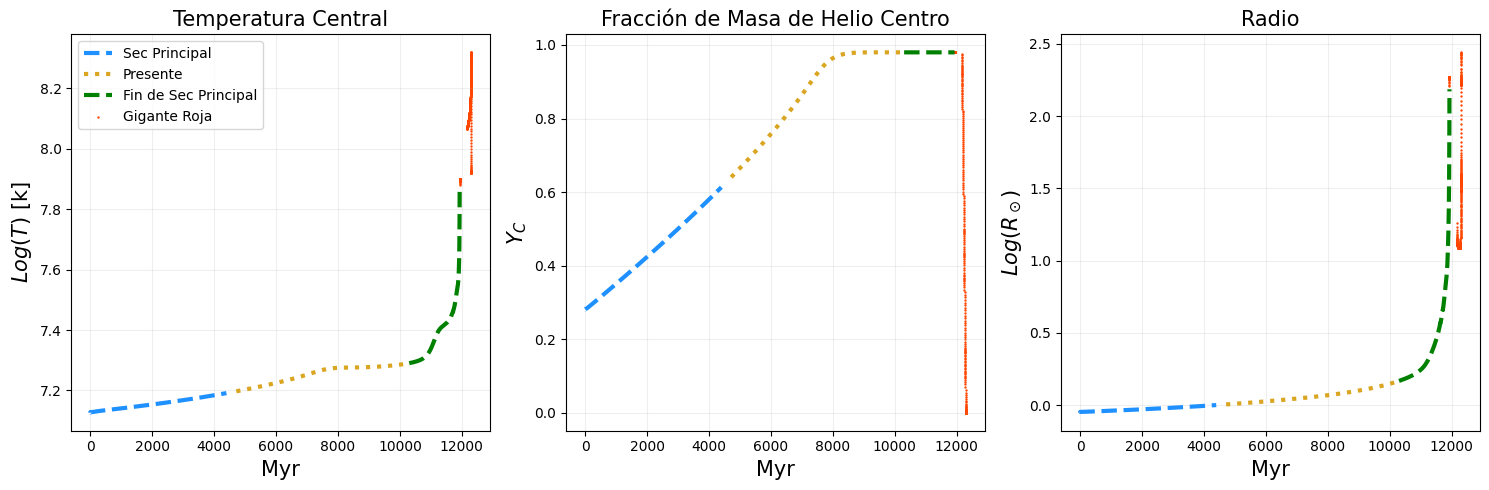

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Edades del Sol
t = sumary.iloc[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
#fig.suptitle("Radio, Temperatura y Fracción de Helio en el Centro del Sol a lo largo de su Vida", fontsize=16, fontweight='bold')
titles = ['Temperatura Central', 'Fracción de Masa de Helio Centro', 'Radio']
y_labels = ["$Log(T)$ [k]", "$Y_C$", "$Log(R_\odot)$"]



for i in range(3):
    axes[i].plot(t[:65]/1e6, sumary.iloc[:65, [6, 11, 4][i]],linestyle="--",linewidth=3, color="dodgerblue",label='Sec Principal')
    axes[i].plot(t[66:135]/1e6, sumary.iloc[66:135, [6, 11, 4][i]],linestyle=":",linewidth=3, color="goldenrod", label='Presente')
    axes[i].plot(t[136:454]/1e6, sumary.iloc[136:454, [6, 11, 4][i]],linestyle="--",linewidth=3, color="green",label='Fin de Sec Principal')
    axes[i].scatter(t[455:]/1e6, sumary.iloc[455:, [6, 11, 4][i]],s=0.5,color="orangered", label='Gigante Roja')


    axes[i].set_title(titles[i], size=15)
    axes[i].set_ylabel(y_labels[i], size=15)

    axes[i].grid(alpha=0.2)
    axes[i].set_xlabel("Myr", size=15)
axes[0].legend()

plt.tight_layout()
plt.show()

## Comentarios


Se observa que durante la secuencia principal la temperatura del Sol empieza a elevarse debido a que el hidrógeno del nucleo se fusiona lentamente en helio liberando energía en forma de calor, el Sol se expande lentamente en esta etapa.

En la fase actual del Sol, este sigue aumentando lentamente la temperatura del centro, continua la fusión de hidrógeno para producir helio y la estrella se expande lentamente.

Entre los 8000 y 10000 millones de años la fusión de hidrógeno en helio cesa, todo el hidrógeno del centro se convierte en helio, esto se refleja en la gráfica de la fracción de helio que se mantiene constante en un valor de 1,como consecuencia el Sol se mantiene a temperatura constante al no haber liberación de energía por parte de la fusión nuclear.

Despues de los 10000 millones de años empieza el fin de la secuencia principal, la temperatura del sol se eleva con rapidez y al mismo tiempo se expande, luego al rededor de los 12000 años el Sol deja de expandirse y se aumentando la temperatura del núcleo y fusiona durante un breve periodo (del orden de los 1000 millones de añors) el helio en carbono, luego liberará su capa exterior dando como remanente una enana blanca y una nebulosa planetaria.


In [ ]:
# Se almacenan las temperaturas presiones y densidad en las distintas etapas de la estrella para los datos realistas

import numpy as np
from astropy.constants import R_sun, M_sun


dataframes = [structure_sp, structure_tp, structure_fsp, structure_Gr]


temp = np.array([df.iloc[:, 3] for df in dataframes])
pres = np.array([df.iloc[:, 1] for df in dataframes])
dens = np.array([df.iloc[:, 2] for df in dataframes])
radio = np.array([df.iloc[:, 0] for df in dataframes])

# Fracción de masa de hidrogeno(X) y helio(Y) del Sol en sus distintas etapas
X = np.array([df.iloc[:, 6] for df in dataframes])
Y = np.array([df.iloc[:, 7] for df in dataframes])


# Se almacenan los valores de los indices adiabáticos y calor específico del Sol en sus distintas etapas
gamma= np.array([df.iloc[:, 5] for df in dataframes])
cesp = np.array([df.iloc[:, 4] for df in dataframes])

# Se almacenan los valores de la masa total del Sol en sus distintas etapas
Msol = np.array([sumary_sp[2],sumary_tp[2],sumary_fsp[2],sumary_Gr[2]])*M_sun.value

# Se almacenan los valores del radio del Sol en sus distintas etapas
Rsol = np.array([10**sumary_sp[4],10**sumary_tp[4],10**sumary_fsp[4],10**sumary_Gr[4]])*R_sun.value





# Se almacenan los perfiles para cada etapa en un array
perfiles = np.array([temp, pres, dens])




## 4. Comparando modelos


Primero se necesita conocer el valor del indice adiabático $\gamma$ que se utilizará en cada etapa, los datos realistas ofrecen un valor de $\gamma$ para cada etapa y en cada etapa para cada radio de la estrella, lo mismo sucede con $C_p$, veamos cómo se comportan estos datos con el radio para cada etapa:

In [ ]:

# Se definen los nombres de las etapas para el widget
etapa = ["Inicio Seq Principal","Presente","Fin de Seq Principal","Gigante Roja"]
def analisis(i):
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.suptitle(f"$\gamma$ y $C_p$ vs Radio para la etapa: {etapa[i]}", fontsize=16, fontweight='bold')

  axes[0].plot(radio[i],gamma[i])
  axes[0].set_ylabel("$\gamma$",fontsize=14)

  axes[1].plot(radio[i],cesp[i])
  axes[1].set_ylabel("$C_p$",fontsize=14)

  for i in range(2):
    axes[i].grid(alpha=0.5)
    axes[i].set_xlabel("$R_{\odot}$",size=15)


  # Ajustar automáticamente los espacios entre subplots

  plt.tight_layout()

  # Mostrar el gráfico
  plt.show()

# Crea una lista de opciones para j en lugar de un rango
i_options = [(etapa[i], i) for i in range(len(etapa))]


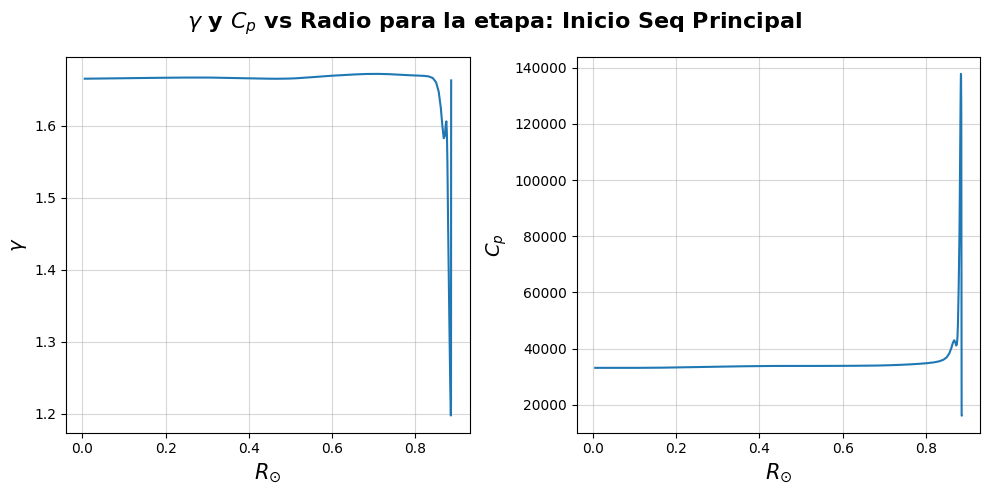

In [ ]:
analisis(0)

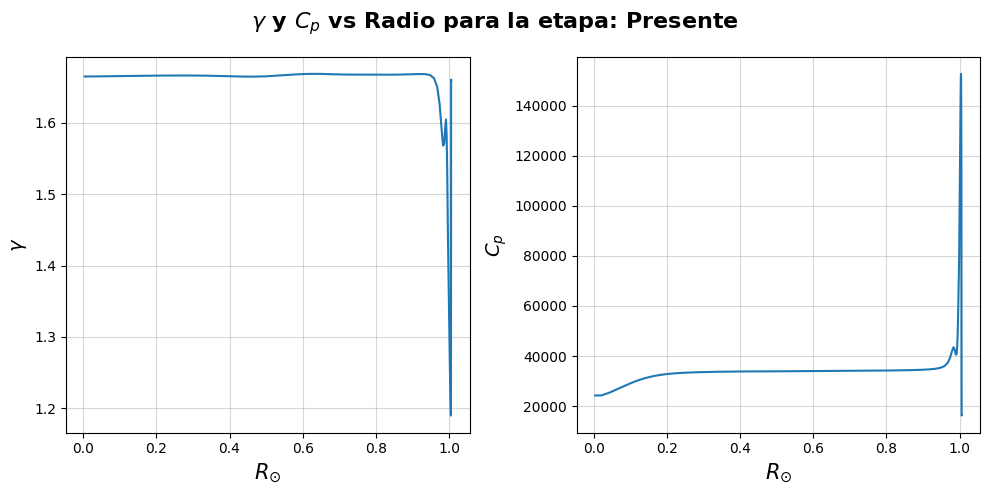

In [ ]:
analisis(1)

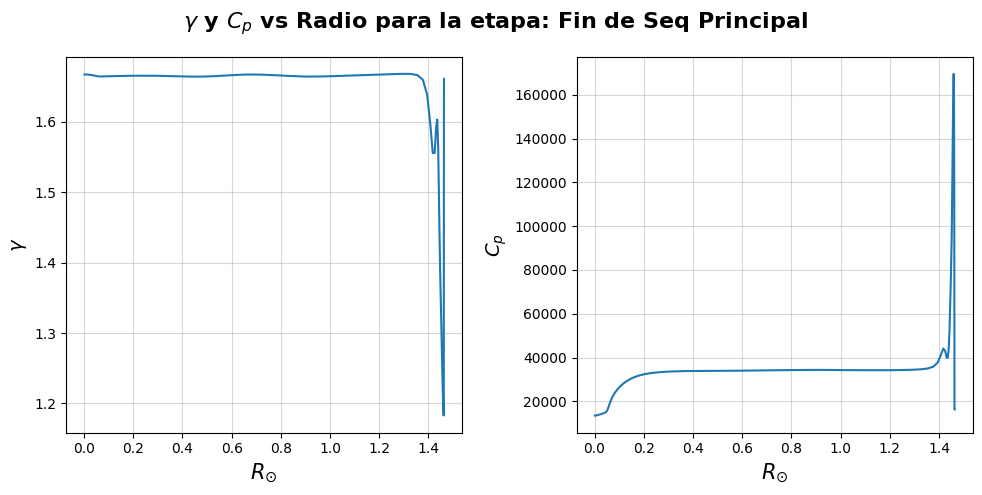

In [ ]:
analisis(2)

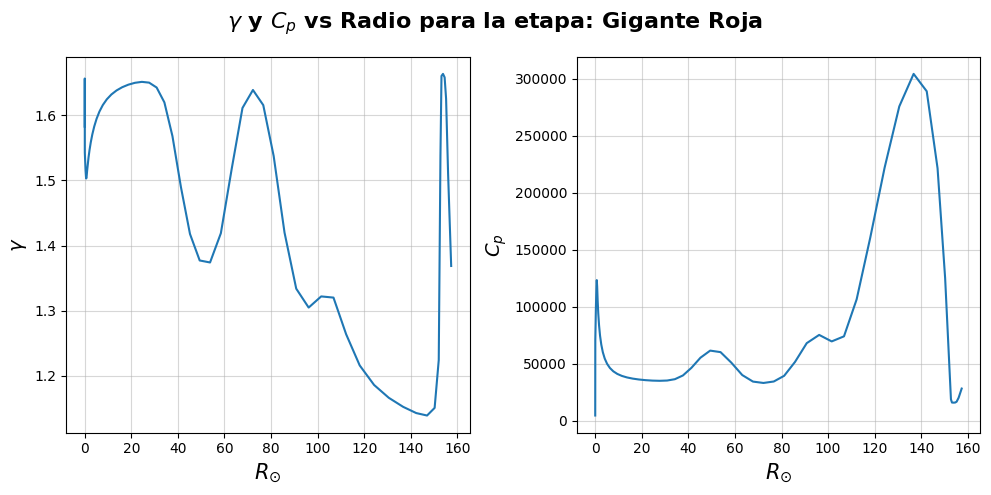

In [ ]:
analisis(3)

Se observa que para el inicio de la secuencia principal, el tiempo presente y el fin de la secuencia principal, el valor de $\gamma$ es aproximadamente el mismo al igual que $C_p$, cerca a la superficie estos valores empiezan a fluctuar bruscamente, se tomará entonces los valores en los que estos parámetros son los mínimos en concordancia con el $\gamma$ del (SSM).

Para la gigante Roja, estos valores fluctúan sin mantenerse casi constantes en ningún punto, para esta etapa se tomará el valor mínimo de $\gamma$ y el máximo de $C_p$ esto debido a que en las próximas simulaciones estos son los valores que no colapsan la integración.

Es de recalcar que el valor de $\gamma$ de las primeras etapas para el Sol en el que este valor es constante, difiere completamnente en el valor aceptado en el SSM (Solar Standar Model) el cual es $\gamma = 1.3333$

Fuente: https://www.journalijar.com/uploads/688_IJAR-9006.pdf

Empezando con esta discrepancia en el valor de $\gamma$ es de esperarse que el modelo no se ajuste adecuadamente a los datos realistas.

Se almacenan los datos de $\gamma$ y $C_p$

In [ ]:
gamas= [min(gamma[0]),min(gamma[1]),min(gamma[2]),min(gamma[3])]
cp = [max(cesp[0]),max(cesp[1]),max(cesp[2]), max(cesp[3])]

## Ecuación Lane-Emden

La ecuación de Lane-Emden es una ecuación diferencial que se utiliza en la astrofísica y la física teórica para modelar la estructura interna de estrellas en equilibrio hidrostático. Fue desarrollada por el astrónomo suizo Robert Emden y el matemático inglés Jonathan Lane. Esta dada por:

$$
\frac{1}{\xi^{2}} \frac{d}{d \xi}\left(\xi^{2} \frac{d\theta}{d \xi}\right)+\theta^{\frac{1}{\gamma-1}}=0
$$

Que se puede escribir como:
$$
\frac{d^2\theta}{d \xi^2}=-\frac{2}{\xi}\frac{d\theta}{d \xi}-\theta^{\frac{1}{\gamma-1}}
$$

La solución de esta ecuación depende del valor de $\gamma$ y describe cómo la densidad, la temperatura y la presión varían en el interior de la estrella.

In [ ]:

# Se importan las librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
from scipy.integrate import solve_ivp,quad
from scipy.interpolate import interp1d

In [ ]:

# Se define la ecuación de Lane-Emden

def lane_emden(x,Y,gamma):

  teta,tetap=Y

  dtetadr = tetap
  dtetapdr = -2/x*tetap-abs(teta)**(1/(gamma-1))

  return np.array([dtetadr,dtetapdr])

#
def surface(t,Y,gamma):
  """Esta rutina detecta cuando la solución a la ecuación llega a la superficie
  que es cuando \theta = 0.
  """
  teta,tetap = Y
  return teta




In [ ]:

# Se define la función para hallar la solución con odeint

def politropa(gamma, xmax=10):
  global surface

  xs=np.linspace(1e-2,xmax,1000) # Valores de ξ
  Yo=[1,0]   # Condiciones iniciales

  # Se resuelve la ecuación
  sol = solve_ivp(lane_emden,[xs[0],xs[-1]],t_eval=xs,y0=Yo,args=(gamma,),events=surface)
  tetas = sol.y[0]
  tetaps = sol.y[1]

  #Buscamos superficie
  if len(sol.t_events[0])>0:
    hasurf = True
    x_surf = sol.t_events[0][0]
    teta_surf = sol.y_events[0][0,0]
    tetap_surf = sol.y_events[0][0,1]
  else:
    hasurf = False
    x_surf = xs[-1]
    teta_surf = tetas[-1]
    tetap_surf = tetaps[-1]

  #Interpolamos
  xns = np.linspace(xs[0],x_surf,1000)
  tetans = np.interp(xns,xs,tetas)
  tetapns = np.interp(xns,xs,tetaps)

  return hasurf, xns, tetans, tetapns

## Cálculo de los perfiles con Lane-Emden

Para hallar los perfiles de temperatura, densidad y presión del Sol con el modelo politrópico de Lane-Emden se necesitan conocer las cantidades $T_c$, $\rho_c$, $p_c$.

$$T_c = \frac{-T_0}{\xi_0\ \theta(\xi_0)}$$

$$\rho_c = \frac{C_p T_c}{4 \pi G \lambda²}$$

De la ecuación de los gases ideales se tiene:

$$ p_c = \frac{R T_c \rho_c}{ M{mol}}$$


En estas ecuaciones $ \lambda = \frac{R_*}{\xi_0} $,  $M_{mol} = \frac{\gamma R}{\gamma-1 C_P}$,  $g_0 = \frac{G M_*}{R_*²}$, $ T_0 = \frac{g_0 R_*}{Cp}$

In [ ]:
# Función para calcular perfiles de densidad presión y temperatura.


def estrella(gama,Rsol,Msol,c,rmax):

  R = 8.31446261815324 #J/kg/mol
  G = 6.67e-11 # m^3/(kg s^2)
  hasurf, xns, tetans, tetapns = politropa(gama,rmax)

  x0 = xns[-1]
  tetap0 = tetapns[-1]

  # Gravedad en la Superficie [m/s²]
  g0 = G*Msol/(Rsol**2)

  # Parametro T0
  T0 = g0*Rsol/c

  # Temperatura central [k]
  Tc = -T0/(x0*tetap0)

  lamb = Rsol/x0

  # Densidad central [kg/m³]
  rhoc = c*Tc/(4*np.pi*G*lamb**2)
  rs = xns*lamb

  # Perfil de temperatura [k]
  Ts = tetans*Tc

  # Masa molar
  Mmol =  gama/(gama-1)*R/c  #kg/mol

  # Presión central [pa]
  pc = R*Tc*rhoc/Mmol

  # Perfiles de densidad y presión
  rhos = (Tc*rhoc**(1-gama)/Ts)**(1/(1-gama))
  ps = (Tc**gama*pc**(1-gama)/Ts**gama)**(1/(1-gama))


  return(rs,[Tc,rhoc,pc],[Ts,rhos,ps])


Veamos los valores de  $T_c$, $\rho_c$, $p_c$ para la etapa actual del Sol

In [ ]:
rs_, centro, perfiles= estrella(gamas[1],Rsol[1],Msol[1],cp[1],10*Rsol[1]/R_sun.value)

print(f"Temperatura central: {perfiles[0][0]:.3e} [K]")
print(f"Densidad central: {perfiles[1][0]:.3e} [kg/m³]")
print(f"Presión central: {perfiles[2][0]:.3e} [pa]")


Temperatura central: 7.758e+06 [K]
Densidad central: 2.919e+05 [kg/m³]
Presión central: 5.515e+16 [pa]


## Gráficas de perfiles de densidad con Lane-Emden y modelo realista

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets


etapa = ["Inicio Seq Principal","Presente","Fin de Seq Principal","Gigante Roja"]
def plot(i,log=False):

    # Crear una figura y subplots en una fila
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(f"Comparación de Perfiles de Temperatura, Densidad y Presión para el Sol \n {etapa[i]}"
                +f" $ \gamma =${gamas[i]:.2f}"
                +f" $ C_p =${cp[i]:.2e}", fontsize=16, fontweight='bold')

      # Ajusta el tamaño y el peso de la fuente del título

    rs,perfil_central, perfil= estrella(gamas[i],Rsol[i],Msol[i],cp[i],10*Rsol[1]/R_sun.value)

    axes[0].plot(rs/R_sun.value,perfil[0], color="orangered",label="Lane-Emden")
    axes[0].plot(radio[i],temp[i],linestyle="--", color="dodgerblue" ,label="Realista")
    axes[0].set_title('Temperatura Central',size=15)
    axes[0].set_ylabel("$T$ [k]",size=15)


    axes[1].plot(rs/R_sun.value,perfil[1],color="orangered",label="Lane-Emden" )
    axes[1].plot(radio[i],dens[i],linestyle="--",color="dodgerblue" ,label="Realista")
    axes[1].set_title('Densidad',size=15)
    axes[1].set_ylabel("$ρ$ [kg/m³]",size=15)


    axes[2].plot(rs/R_sun.value,perfil[2], color="orangered",label="Lane-Emden"  )
    axes[2].plot(radio[i],pres[i], linestyle="--", color="dodgerblue",label="Realista")
    axes[2].set_title('Presión',size=15)
    axes[2].set_ylabel("$p$ Gpa",size=15)

    for i in range(3):
      axes[i].grid(alpha=0.5)
      axes[i].set_xlabel("$R_{\odot}$",size=15)
      axes[i].legend(fontsize=12)
      if log:
        axes[i].set_yscale("log")
    # Ajustar automáticamente los espacios entre subplots

    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
# Crea una lista de opciones para j en lugar de un rango
i_options = [(etapa[i], i) for i in range(len(etapa))]


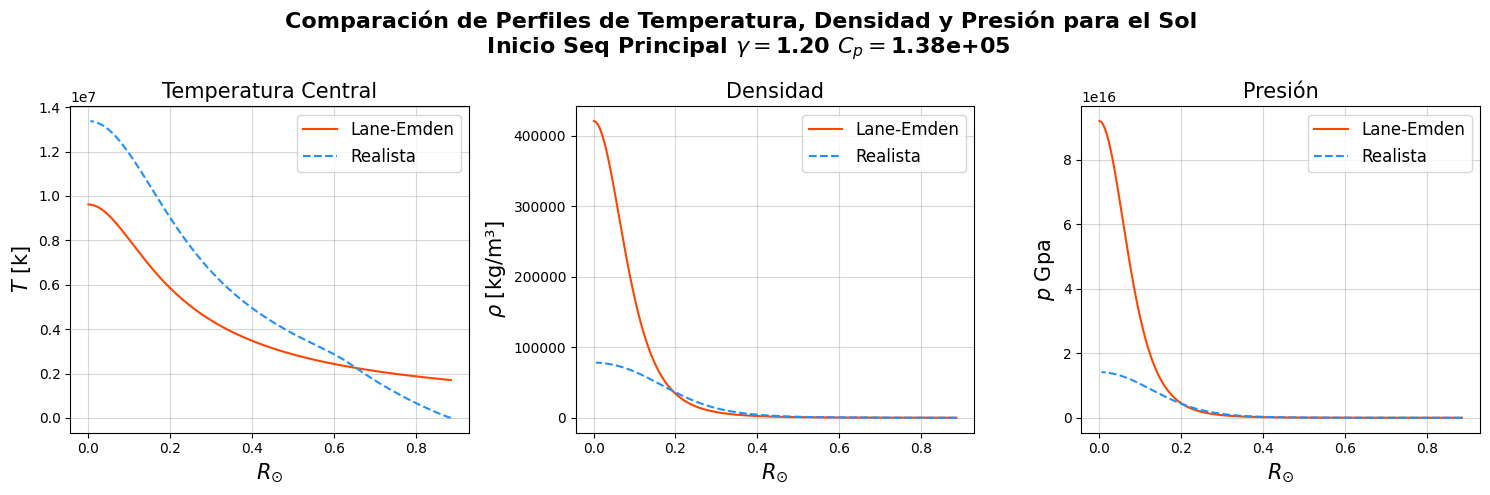

In [ ]:
plot(0)

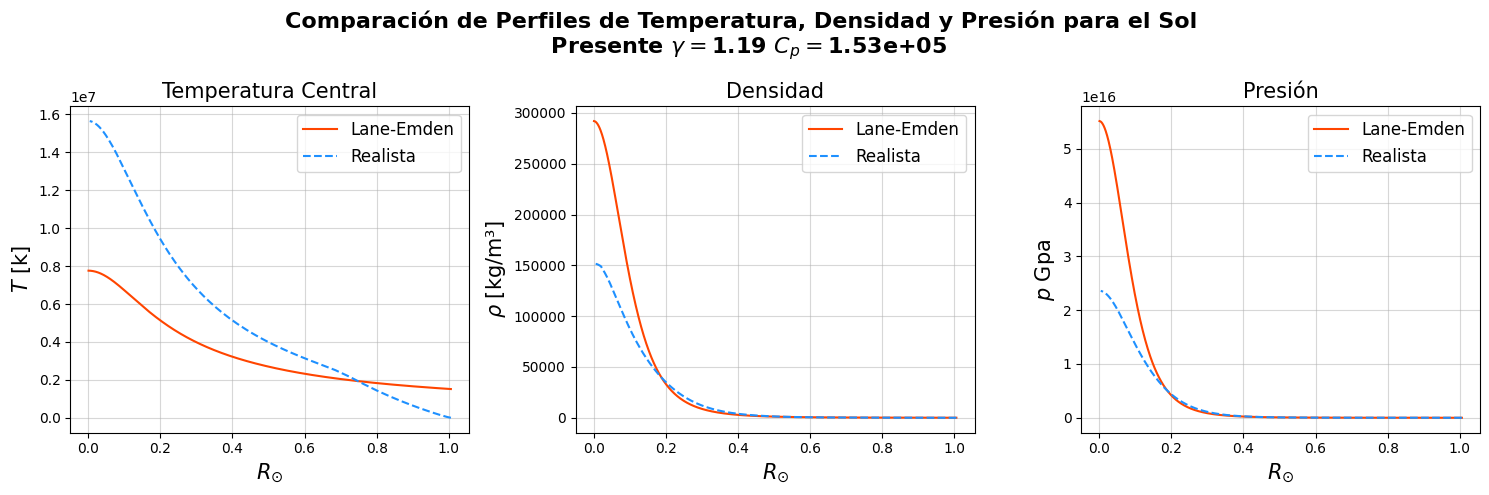

In [ ]:
plot(1)

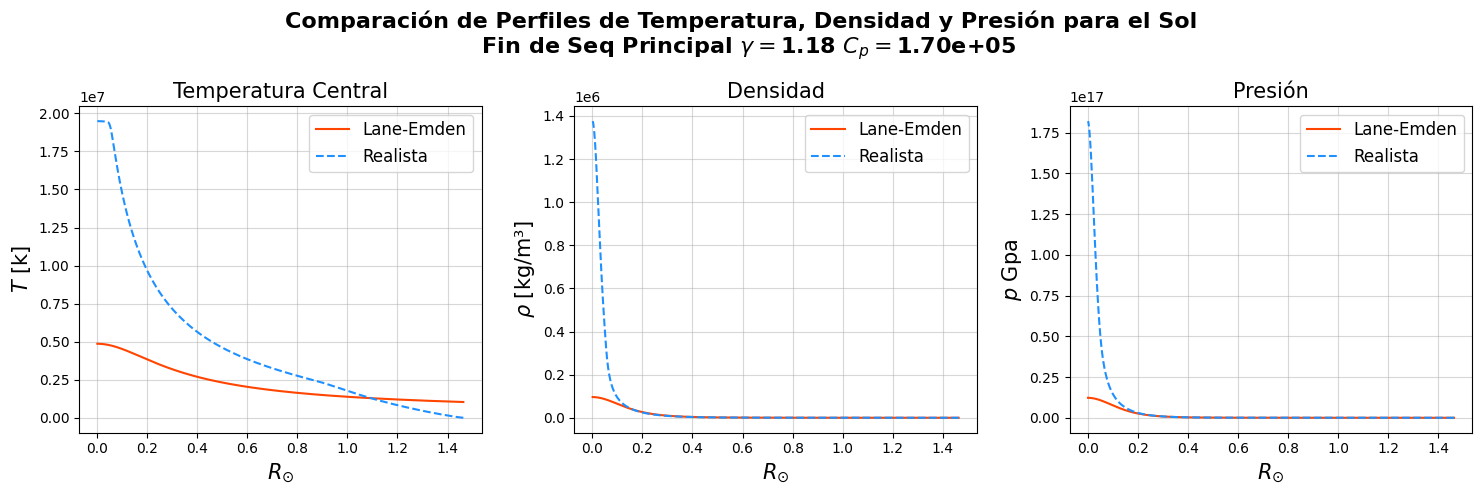

In [ ]:
plot(2)

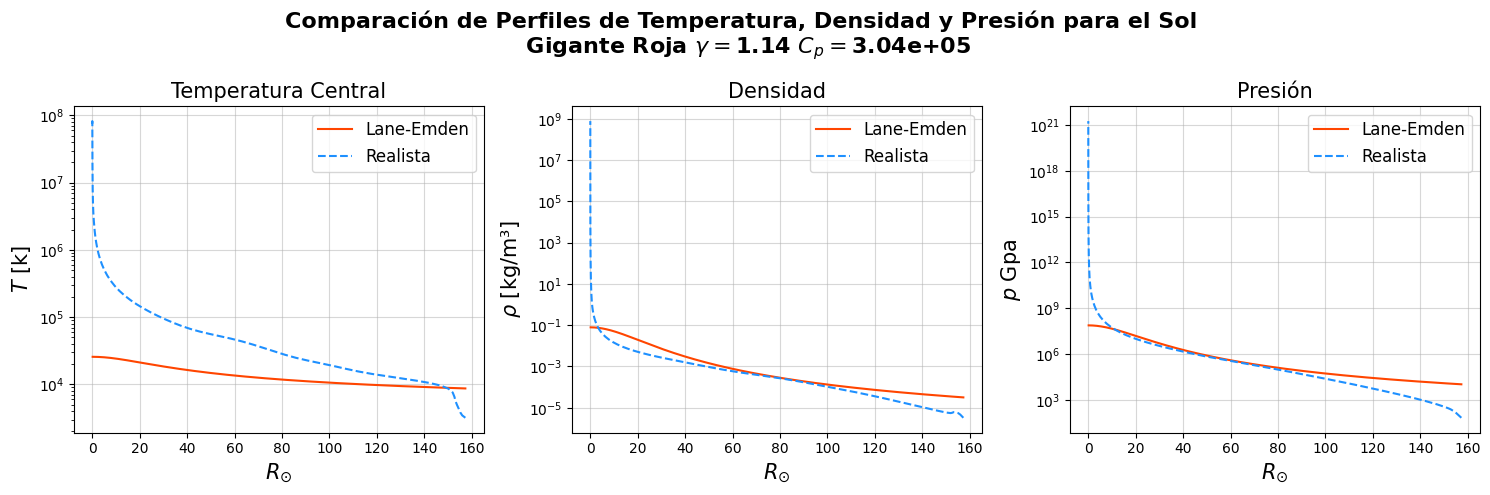

In [ ]:
plot(3,log=True)

Se observa que los perfiles obtenidos con Lane-Emden difieren de los datos realistas, esto se debe a la fluctuación del índice adiabático $\gamma$ y el calor específico, se experimentó tomando el promedio, el mínimo, la mediana y el máximo sin embargo en ninguno se alcanzó un buen ajuste.
Estos parámetros son necesarios para hallar la temperatura,densidad y presión en el centro, y estos ultimos a su vez definen el punto inicial y final del ajuste con el modelo de Lane-Emden

# Gráfica para calibrar valores de $\gamma$ , $T_0$, $C_{p}$

Para evidenciar la dependencia del ajuste del modelo de Lane-Emden con $\gamma$, $T_0$ y $C_p$ se hizo un gráfico interactivo.

In [ ]:
etapa = ["Inicio Seq Principal","Presente","Fin de Seq Principal","Gigante Roja"]
def plot(i,γ,Cp,log=False):

    # Crear una figura y subplots en una fila
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Comparación de Perfiles de Temperatura, Densidad y Presión para el Sol \n {etapa[i]}", fontsize=16, fontweight='bold')  # Ajusta el tamaño y el peso de la fuente del título


    rs,perfil_central, perfil = estrella(γ,Rsol[i],Msol[i],Cp,10*Rsol[i]/R_sun.value)


    axes[0].plot(rs/R_sun.value,perfil[0], color= "orangered",label="Lane-Emden")
    axes[0].plot(radio[i],temp[i],linestyle="--", color="dodgerblue",label="Realista")
    axes[0].set_title('Temperatura Central',size=15)
    axes[0].set_ylabel("$T$ [k]",size=15)


    axes[1].plot(rs/R_sun.value,perfil[1], color= "orangered",label="Lane-Emden" )
    axes[1].plot(radio[i],dens[i],linestyle="--",  color="dodgerblue" ,label="Realista")
    axes[1].set_title('Densidad',size=15)
    axes[1].set_ylabel("$ρ$ [kg/m³]",size=15)


    axes[2].plot(rs/R_sun.value,perfil[2],  color="orangered",label="Lane-Emden"  )
    axes[2].plot(radio[i],pres[i],color="dodgerblue" ,linestyle="--",label="Realista")
    axes[2].set_title('Presión',size=15)
    axes[2].set_ylabel("$p$ Gpa",size=15)

    for i in range(3):
      axes[i].grid(alpha=0.5)
      axes[i].set_xlabel("$R_{\odot}$",size=15)
      axes[i].legend(fontsize=12)
      if log:
        axes[i].set_yscale("log")
    # Ajustar automáticamente los espacios entre subplots

    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
# Crea una lista de opciones para j en lugar de un rango
i_options = [(etapa[i], i) for i in range(len(etapa))]
# Utiliza el widget interact para crear la interfaz interactiva
interact(plot,i=widgets.Dropdown(options=i_options, description='Etapa:'),
         γ =widgets.FloatSlider(value=1.333,min=0.1, max=5, step=0.001,description='γ'),
         Cp=widgets.FloatSlider(value=55000,min=1000, max=100000, step=1000,description='Cp'))

interactive(children=(Dropdown(description='Etapa:', options=(('Inicio Seq Principal', 0), ('Presente', 1), ('…

<function __main__.plot(i, γ, Cp, log=False)>

# 5. Ajustando el Modelo


Para ajustar el modelo de Lane Emden a los datos realistas, se omitió el cálculo de $T_0$, $g_0$, y los valores de $\gamma$ y $C_p$ proporcionados por los datos realistas que en la ecuación de Lane-Emden se utiliza para hallar $\rho_c$, $T_c$, $p_c$. En el punto anterior estos datos diferían de los valores reales lo que no permitía un ajuste óptimo de los datos, en cambio, se utilizarán los datos de presión, temperatura y densidad central proporcionados por los datos realistas, veamos como se ajusta el modelo:


Se almacenan los datos de temperatura, densidad y presión central provistos por los datos realistas

In [ ]:
Tcen = 10**np.array([sumary_sp[6],sumary_tp[6],sumary_fsp[6],sumary_Gr[6]])
Rhocen = 10**np.array([sumary_sp[7],sumary_tp[7],sumary_fsp[7],sumary_Gr[7]])
Prescen = 10**np.array([sumary_sp[8],sumary_tp[8],sumary_fsp[8],sumary_Gr[8]])

Se redefine la función estrella con los nuevos valores de $\rho_c$, $T_c$, $p_c$

Los valores de $M_{mol}$ y $C_p$ se calculan con las expresiones:


$$M_{mol} = \frac{\rho R T}{p} $$


$$C_p=\frac{\gamma R}{(\gamma-1) M_{mol}}$$

In [ ]:
def estrella2(etapa,gama,Rsol,rmax):

  R = 8.31446261815324 #J/kg/mol
  G = 6.67e-11 # m^3/(kg s^2)
  hasurf, xns, tetans, tetapns = politropa(gama,rmax)

  x0 = xns[-1]
  tetap0 = tetapns[-1]

  # Temperatura central
  Tc = Tcen[etapa]

  lamb = Rsol/x0

  # Densidad central
  rhoc = Rhocen[etapa]
  rs = xns*lamb


  # Temperatura
  Ts = tetans*Tc



  # Presión central
  pc = Prescen[etapa]
  rhos = (Tc*rhoc**(1-gama)/Ts)**(1/(1-gama))
  ps = (Tc**gama*pc**(1-gama)/Ts**gama)**(1/(1-gama))

  Mmol= rhos[0]*R*Ts[0]/ps[0]
  cp = gama/(gama-1)*R/Mmol


  return(rs,cp,[Tc,rhoc,pc],[Ts,rhos,ps])


In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets


etapa = ["Inicio Seq Principal","Presente","Fin de Seq Principal","Gigante Roja"]
def plot2(i,gama,log=False):


    # Perfiles de Temp,Dens, Pres en cada etapa
    rs,cp,perfil_central, perfil = estrella2(i,gama,Rsol[i],10*Rsol[i]/R_sun.value)
    # Crear una figura y subplots en una fila


    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Comparación de Perfiles de Temperatura, Densidad y Presión para el Sol \n {etapa[i]}"
                +f" $ \gamma =${gama:.2f}"+f" $C_p =${cp:.2f}",fontsize=16, fontweight='bold')


    axes[0].plot(rs/R_sun.value,perfil[0], color= "orangered",label="Lane-Emden")
    axes[0].plot(radio[i],temp[i],linestyle="--" ,color="dodgerblue",label="Realista")
    axes[0].set_title('Temperatura Central',size=15)
    axes[0].set_ylabel("$T$ [k]",size=15)


    axes[1].plot(rs/R_sun.value,perfil[1], color= "orangered",label="Lane-Emden" )
    axes[1].plot(radio[i],dens[i],linestyle="--",color="dodgerblue" ,label="Realista")
    axes[1].set_title('Densidad',size=15)
    axes[1].set_ylabel("$ρ$ [kg/m³]",size=15)


    axes[2].plot(rs/R_sun.value,perfil[2],  color= "orangered",label="Lane-Emden"  )
    axes[2].plot(radio[i],pres[i], linestyle="--",color="dodgerblue" ,label="Realista")
    axes[2].set_title('Presión',size=15)
    axes[2].set_ylabel("$p$ Gpa",size=15)

    for i in range(3):
      axes[i].grid(alpha=0.5)
      axes[i].set_xlabel("$R_{\odot}$",size=15)
      axes[i].legend(fontsize=12)
      if log:
        axes[i].set_yscale("log")
    # Ajustar automáticamente los espacios entre subplots

    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
# Crea una lista de opciones para j en lugar de un rango
i_options = [(etapa[i], i) for i in range(len(etapa))]
# Utiliza el widget interact para crear la interfaz interactiva


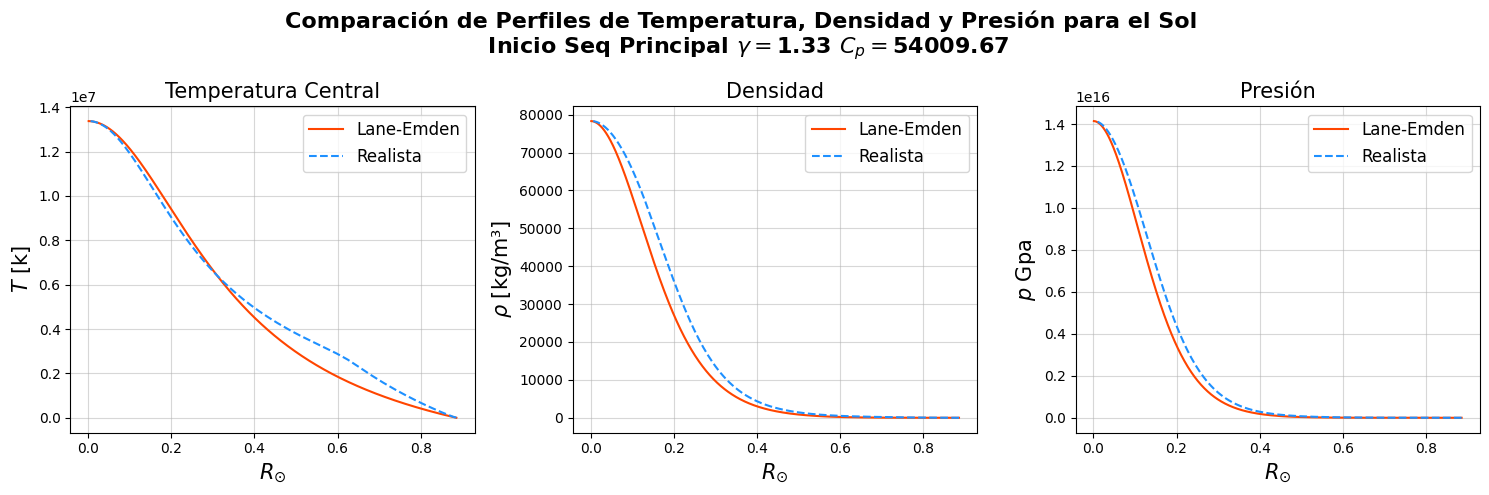

In [ ]:
plot2(0,1.3333)

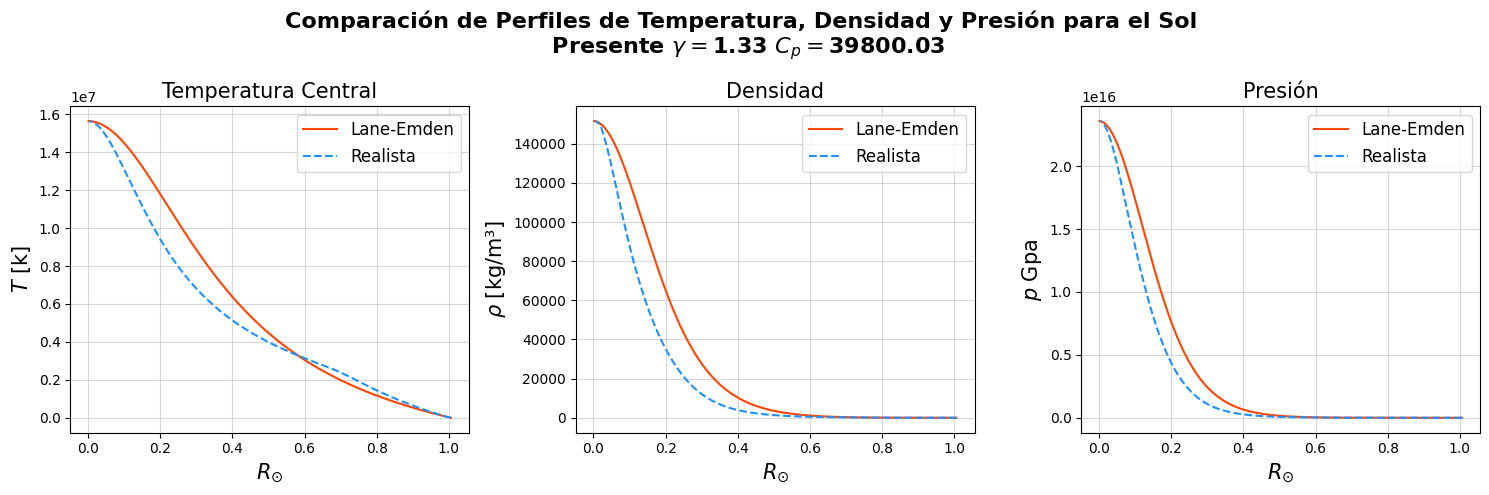

In [ ]:
plot2(1,1.3333)

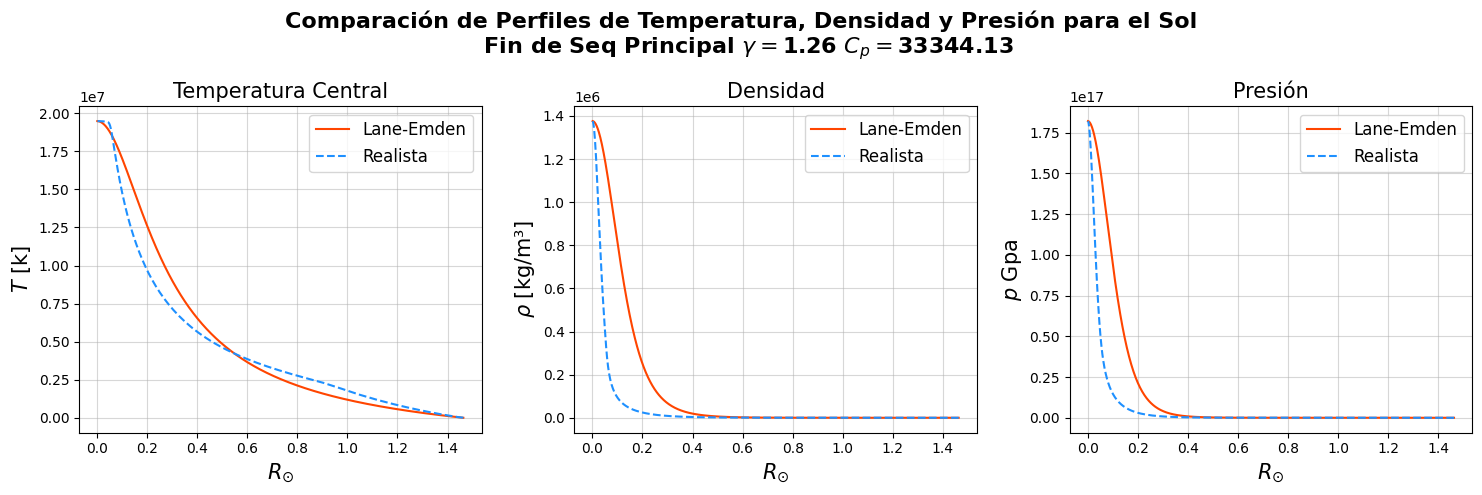

In [ ]:
plot2(2,1.2556)

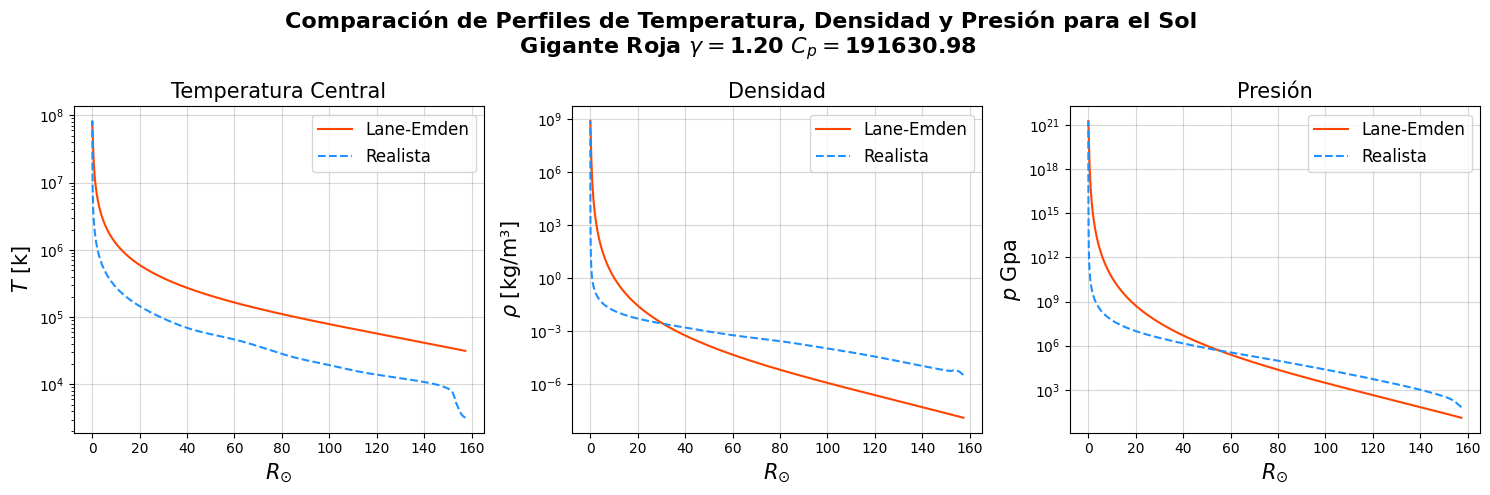

In [ ]:
plot2(3,1.2012,log=True)


Para llegar a los siguientes resultados, se fue variando $\gamma$ hasta encontrar el ajuste más óptimo para cada etapa, con la gráfica de calibraciones.

Se observa que tanto para el inicio de la secuencia principal como el tiempo presente, el indice adiabático que mejor ajusta los datos es el predicho por el Solar Standar Model $\gamma=1.3333$, el calor específico a presión constante que mejor ajusta los datos para estas etapas es de $C_p=54416.76$ [J/(kg K)].


Para el final de la secuencia principal, cuando el Sol termina la fusión de hidrógeno en helio, el indice adiabático que mejor ajusta los datos esta entre $\gamma=1.25$ y $\gamma=1.29$, el calor específico es aproximadamente $C_p = 32744$ [J/(kg K)].

Para la fase de gigante Roja el valor del índice adiabático que mejor ajusta la curva es de aproximadamente $\gamma=1.2$, $C_p = 197126$ [J/(kg K)]

Cabe resaltar que cuando la temperatura del Sol alcanza 75 millones de grados en el centro correspondiente a esta etapa, la masa predicha por los datos reales no tiene sentido puesto que una gigante Roja alcanza hasta 190 veces la masa del Sol y según los datos realistas, la masa del Sol en gigante roja es de 0.9 Masas solares, esto hace que los ajustes para la gigante roja sean inexactos.

Fuente: https://cesar.esa.int/upload/201807/evolucion_estelar_booklet.pdf

In [ ]:
Msol[3]/M_sun.value

0.900595223